In [1]:
import numpy as np
from functools import partial

from simulation import Simulation
from objective_functions import LogisticRegression, LinearRegression
from optimization_algorithms import SNARiccati
from datasets import generate_logistic_regression, generate_linear_regression

In [2]:
N = 10  # number of runs for averaging the results
n = int(1e4)
objective_function = LogisticRegression(bias=True)
true_theta = np.array([0, 3, -9, 4, -9, 15, 0, -7, 1, 0])  # Article, set bias=True
# true_theta = np.array([-2., -1., 0., 1., 2.])     # cf slides, and set bias=False
# true_theta = np.array([1,1,1,1,1])      # Poly, set bias=False

optimizer_class = SNARiccati
mu_list = [0.45, 0.5, 0.66, 0.75, 1.0, 1.05]
optimizer_list = [optimizer_class(mu=mu) for mu in mu_list]

e = 1

simulation = Simulation(
    objective_function,
    optimizer_list,
    e,
    true_theta=true_theta,
    generate_dataset=partial(generate_logistic_regression, bias=True),
)

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/10000 [00:00<?, ?it/s]

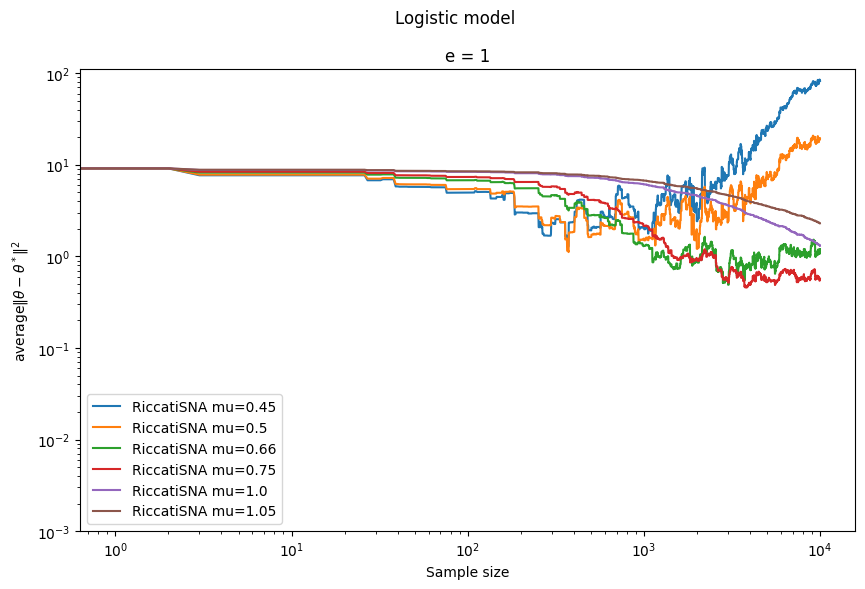

In [3]:
# One run
simulation.dataset = simulation.generate_dataset(n, true_theta)
simulation.generate_initial_theta()
_, _ = simulation.run(plot=True)

Runs:   0%|          | 0/10 [00:00<?, ?it/s]

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/10000 [00:00<?, ?it/s]

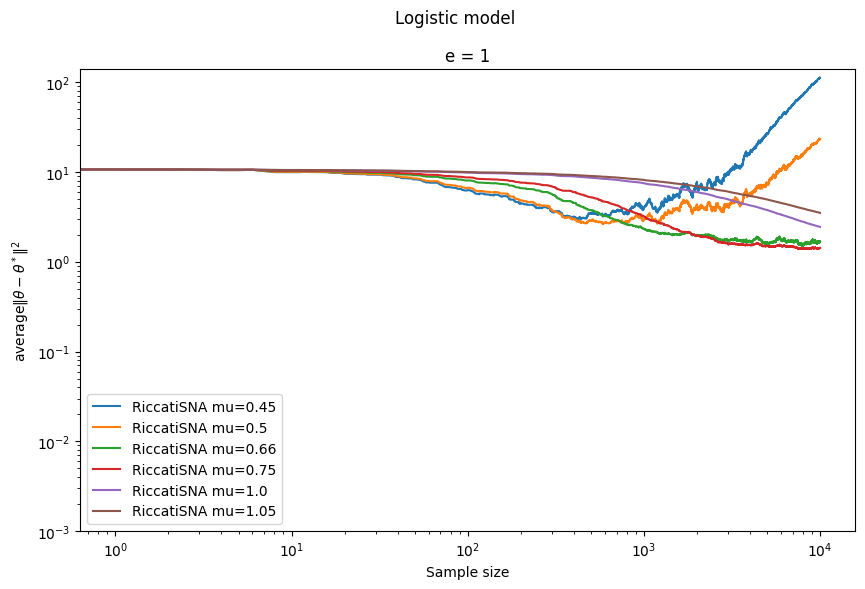

In [4]:
simulation.run_multiple_datasets(num_runs=N, n=n)

In [5]:
objective_function = LinearRegression(bias=False)
simulation = Simulation(
    objective_function,
    optimizer_list,
    e,
    true_theta=true_theta,
    generate_dataset=partial(generate_linear_regression, bias=False),
)

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/10000 [00:00<?, ?it/s]

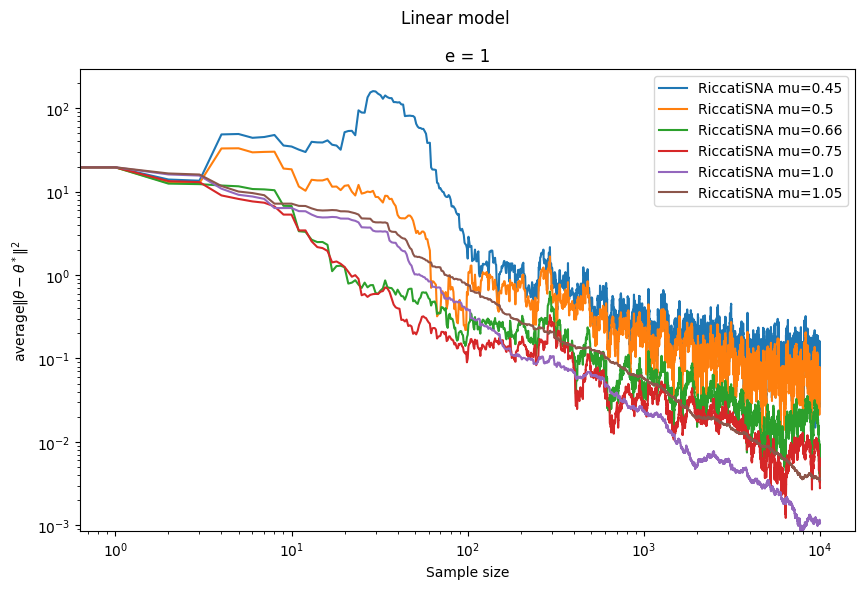

In [6]:
# One run
simulation.dataset = simulation.generate_dataset(n, true_theta)
simulation.generate_initial_theta()
_, _ = simulation.run(plot=True)

Runs:   0%|          | 0/10 [00:00<?, ?it/s]

Optimizers:   0%|          | 0/6 [00:00<?, ?it/s]

Data:   0%|          | 0/10000 [00:00<?, ?it/s]

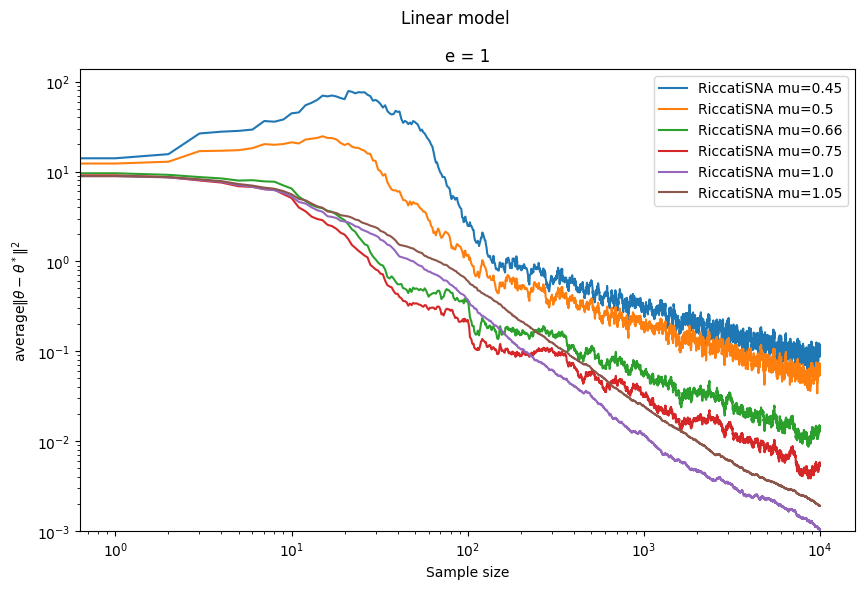

In [7]:
simulation.run_multiple_datasets(num_runs=N, n=n)